In [192]:
import pandas_datareader.data as web 
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
import yfinance as yf

In [193]:
stocks = ['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']

number_of_portfolios = 500
RF = 0

start_date = "2012-03-09"
end_date = "2023-03-13"

In [194]:
data = yf.download(stocks, start=start_date, end=end_date)
df = data['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [195]:
df.head()

,AJAX.AS,BVB.DE,JUVE.MI,OLG.PA
Date,,,,
2012-03-09,7.016698,2.273793,0.190636,2.240000
2012-03-12,6.787269,2.251545,0.184189,2.217142
2012-03-13,6.882864,2.282692,0.196990,2.217142
2012-03-14,6.796828,2.296042,0.197451,2.211428
2012-03-15,6.796828,2.313840,0.196162,2.217142


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2012-03-09 to 2023-03-10
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AJAX.AS  2816 non-null   float64
 1   BVB.DE   2791 non-null   float64
 2   JUVE.MI  2794 non-null   float64
 3   OLG.PA   2816 non-null   float64
dtypes: float64(4)
memory usage: 110.2 KB


In [197]:
portfolio_returns = []
portfolio_risk = []
portfolio_weights = []
portfolio_sharpe_ratios = []

In [198]:
for portfolio in range (number_of_portfolios):
    
    # geenrate random weights
    weights = np.random.random_sample(len(stocks))
    weights = np.round(weights/np.sum(weights), 2)
    portfolio_weights.append(weights)
    
    # calculate portfolio returns
    annualized_return = np.sum((df.pct_change().mean() * weights) * 252)
    portfolio_returns.append(annualized_return)

    # calculate portfolio risk
    matrix_covariance = df.pct_change().cov()
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights)) * 252
    portfolio_Standard_Deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_Standard_Deviation)
    
    # calculate portfolio sharpe ratio
    portfolio_sharpe_ratio = (annualized_return -RF) / portfolio_Standard_Deviation
    portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)
    

In [199]:
print(portfolio_returns)

[0.10044843559952998, 0.10830979835961951, 0.10882184936406787, 0.09471114029207235, 0.09627055054526475, 0.10420229579459453, 0.10176048345273453, 0.11397006039918345, 0.0985481759958787, 0.10049109221034351, 0.1027206075664169, 0.09064758991402769, 0.09087508943341358, 0.11704185118872468, 0.1013248488269468, 0.11285174222733035, 0.09347213062683332, 0.10861054057310073, 0.10012345404974488, 0.10263622531471397, 0.10332869164550032, 0.11776480134972793, 0.10319400038965176, 0.09769761785998651, 0.10005650697609506, 0.10152795563043146, 0.09954205987740816, 0.0937867529580286, 0.09910049758708944, 0.11162339519020398, 0.09464595565389687, 0.10291631760923176, 0.10355987276510414, 0.10196264311774485, 0.09935249207544147, 0.09265678396324335, 0.1105846220534072, 0.0989602977491569, 0.10169259931079769, 0.11151134428496964, 0.09799783873795584, 0.1086006044087824, 0.09563463436286518, 0.10923495931216554, 0.09972007910950764, 0.10612753064637873, 0.10617190191580603, 0.10164010878873071

In [200]:
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
portfolio_sharpe_ratios = np.array(portfolio_sharpe_ratios) 
portfolio_metrics = [portfolio_returns, portfolio_risk, portfolio_sharpe_ratios, portfolio_weights]

In [201]:
port_df = pd.DataFrame(portfolio_metrics).T
port_df.columns = ['Returns', 'Risk', 'Sharpe Ratio', 'Weights']
port_df

,Returns,Risk,Sharpe Ratio,Weights
0,0.100448,0.193462,0.519214,"[0.33, 0.23, 0.21, 0.24]"
1,0.10831,0.219187,0.494142,"[0.32, 0.3, 0.33, 0.06]"
2,0.108822,0.226556,0.480332,"[0.41, 0.12, 0.39, 0.09]"
3,0.094711,0.199699,0.47427,"[0.26, 0.14, 0.17, 0.42]"
4,0.096271,0.19074,0.504722,"[0.39, 0.31, 0.12, 0.18]"
...,...,...,...,...
495,0.104728,0.246687,0.424538,"[0.01, 0.15, 0.35, 0.49]"
496,0.108679,0.221632,0.490359,"[0.29, 0.28, 0.36, 0.07]"
497,0.099745,0.198889,0.50151,"[0.26, 0.41, 0.16, 0.17]"
498,0.105472,0.21271,0.49585,"[0.16, 0.3, 0.32, 0.21]"


In [202]:
port_df.to_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\Portfolio_Forecasting_Optimization\\datas\\Portfolios.csv')

In [203]:
min_risk = port_df.iloc[port_df['Risk'].astype(float).idxmin()]   
min_risk

Returns                        0.094722
Risk                           0.188881
Sharpe Ratio                   0.501491
Weights         [0.4, 0.22, 0.12, 0.26]
Name: 90, dtype: object

In [204]:
high_return = port_df.iloc[port_df['Returns'].astype(float).idxmax()]   
high_return

Returns                         0.127289
Risk                            0.342444
Sharpe Ratio                    0.371708
Weights         [0.07, 0.03, 0.79, 0.11]
Name: 285, dtype: object

In [205]:
Best_SR = port_df.iloc[port_df['Sharpe Ratio'].astype(float).idxmax()]   
Best_SR

Returns                          0.10055
Risk                            0.193494
Sharpe Ratio                    0.519653
Weights         [0.29, 0.26, 0.22, 0.23]
Name: 382, dtype: object

In [206]:
print('Min Risk')
print(min_risk)
print(stocks)
print('')


print('Highest Return')
print(high_return)
print(stocks)
print('')


print('Best Sharpe Ratio')
print(Best_SR)
print(stocks)
print('')

Min Risk
Returns                        0.094722
Risk                           0.188881
Sharpe Ratio                   0.501491
Weights         [0.4, 0.22, 0.12, 0.26]
Name: 90, dtype: object
['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']

Highest Return
Returns                         0.127289
Risk                            0.342444
Sharpe Ratio                    0.371708
Weights         [0.07, 0.03, 0.79, 0.11]
Name: 285, dtype: object
['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']

Best Sharpe Ratio
Returns                          0.10055
Risk                            0.193494
Sharpe Ratio                    0.519653
Weights         [0.29, 0.26, 0.22, 0.23]
Name: 382, dtype: object
['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']



In [207]:
df_best = pd.concat([min_risk, Best_SR, high_return], axis=1)

In [208]:
df_best.columns = ['Min Risk', 'Best Sharpe Ratio', 'Highest Return']   

In [209]:
df_best 

,Min Risk,Best Sharpe Ratio,Highest Return
Returns,0.094722,0.10055,0.127289
Risk,0.188881,0.193494,0.342444
Sharpe Ratio,0.501491,0.519653,0.371708
Weights,"[0.4, 0.22, 0.12, 0.26]","[0.29, 0.26, 0.22, 0.23]","[0.07, 0.03, 0.79, 0.11]"


In [210]:
df_best.to_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\Portfolio_Forecasting_Optimization\\datas\\BestPortfolio.csv')

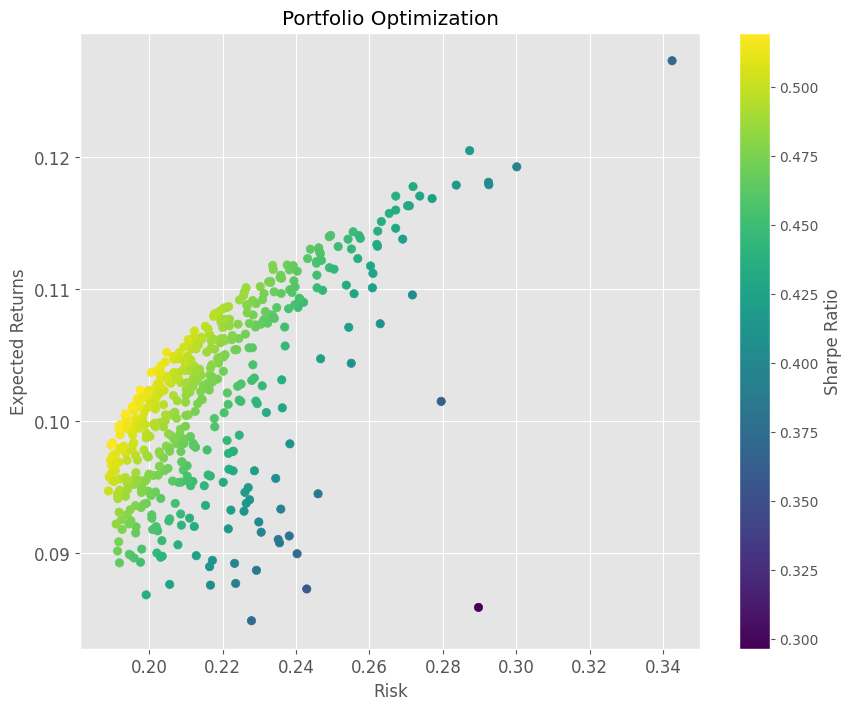

In [211]:
# visuzalization

plt.figure(figsize=(10, 8))
plt.scatter(port_df.Risk, port_df.Returns, c=portfolio_returns / portfolio_risk)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(label='Sharpe Ratio')